# Источник данных

https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Курс Питон/Портфолио/Кейс_1/bank.csv')

In [ ]:
# Замена значений в столбце education
education_mapping = {
    'primary': 'начальное',
    'secondary': 'среднее',
    'tertiary': 'высшее'
}
df['education'] = df['education'].map(education_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  10665 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Гипотеза 1: Определенные возрастные группы более склонны к открытию депозита.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Проверка первой гипотезы: Определенные возрастные группы более склонны к открытию депозита

# Добавим колонку для бинарного представления открытия депозита
df['deposit_binary'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)


In [ ]:
# Создание возрастных групп
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [ ]:
# Группировка по возрастным группам и подсчет средней вероятности открытия депозита в процентах
age_group_deposit = df.groupby('age_group')['deposit_binary'].mean() * 100
age_group_deposit = age_group_deposit.reset_index()

<ipython-input-10-0726facb8764>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_deposit = df.groupby('age_group')['deposit_binary'].mean() * 100


In [ ]:
# Сортировка по вероятности открытия депозита
age_group_deposit = age_group_deposit.sort_values(by='deposit_binary', ascending=False)

In [ ]:
age_group_deposit

,age_group,deposit_binary
0,<20,85.714286
6,70+,79.391892
5,60-70,75.413223
1,20-30,59.477124
2,30-40,44.302918
4,50-60,41.644562
3,40-50,40.449011


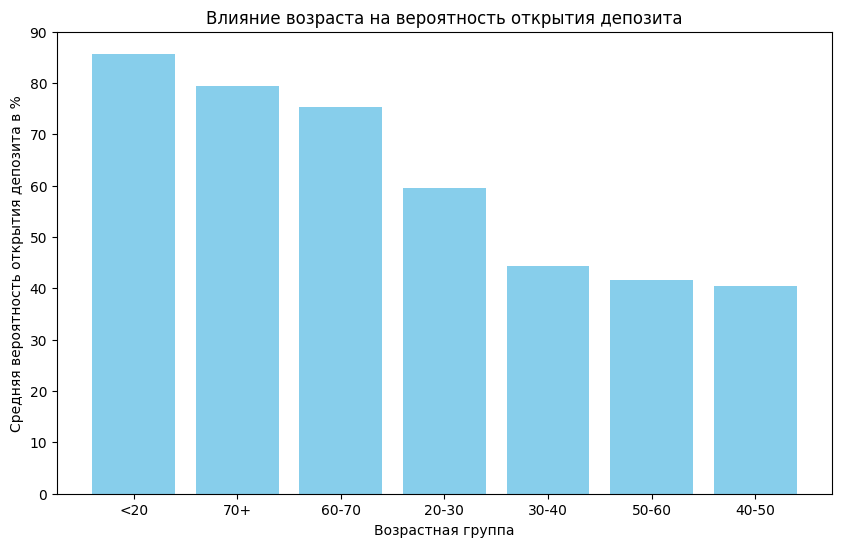

In [ ]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(age_group_deposit['age_group'], age_group_deposit['deposit_binary'], color='skyblue')
plt.xlabel('Возрастная группа')
plt.ylabel('Средняя вероятность открытия депозита в %')
plt.title('Влияние возраста на вероятность открытия депозита')
plt.show()


## Вывод

Вероятность открытия депозита в группах <20, 60+ выше 70%.

# Гипотеза 2: Семейное положение влияет на вероятность открытия депозита.

In [ ]:
# Группировка по семейному положению и подсчет средней вероятности открытия депозита
marital_deposit = df.groupby('marital')['deposit_binary'].mean()*100
marital_deposit = marital_deposit.reset_index()

# Сортировка по вероятности открытия депозита
marital_deposit = marital_deposit.sort_values(by='deposit_binary', ascending=False)

marital_deposit

,marital,deposit_binary
2,single,54.349062
0,divorced,48.105182
1,married,43.378995


In [ ]:
# Заменяем значения в столбце 'marital' с помощью метода replace()
marital_deposit['marital'] = marital_deposit['marital'].replace({
    'single': 'одинокий',
    'divorced': 'в разводе',
    'married': 'в браке'
})

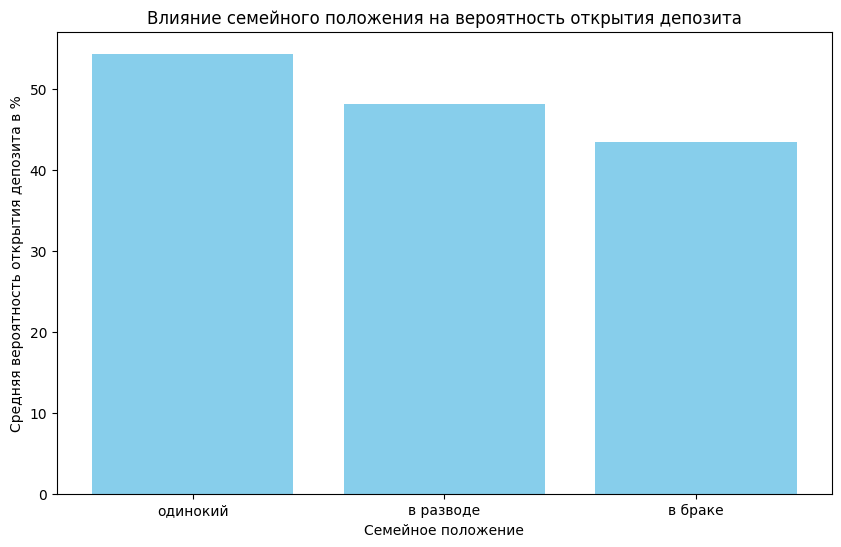

In [ ]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.bar(marital_deposit['marital'], marital_deposit['deposit_binary'], color='skyblue')
plt.xlabel('Семейное положение')
plt.ylabel('Средняя вероятность открытия депозита в %')
plt.title('Влияние семейного положения на вероятность открытия депозита')
plt.show()

## Вывод

С большей вероятностью депозит открывают одинокие люди (54%). На втором месте люди в разводе (48%) и с меньшей вероятностью депозит откроют семейные люди (43%).

# Гипотеза 3: Уровень образования влияет на вероятность открытия депозита

In [ ]:
df2 = df.query('education != "unknown"')

In [ ]:
# Группировка по уровню образования и подсчет средней вероятности открытия депозита
education_deposit = df2.groupby('education')['deposit_binary'].mean()*100
education_deposit = education_deposit.reset_index()


# Сортировка по вероятности открытия депозита
education_deposit = education_deposit.sort_values(by='deposit_binary', ascending=False)

education_deposit

,education,deposit_binary
0,высшее,54.106804
2,среднее,44.740687
1,начальное,39.400000


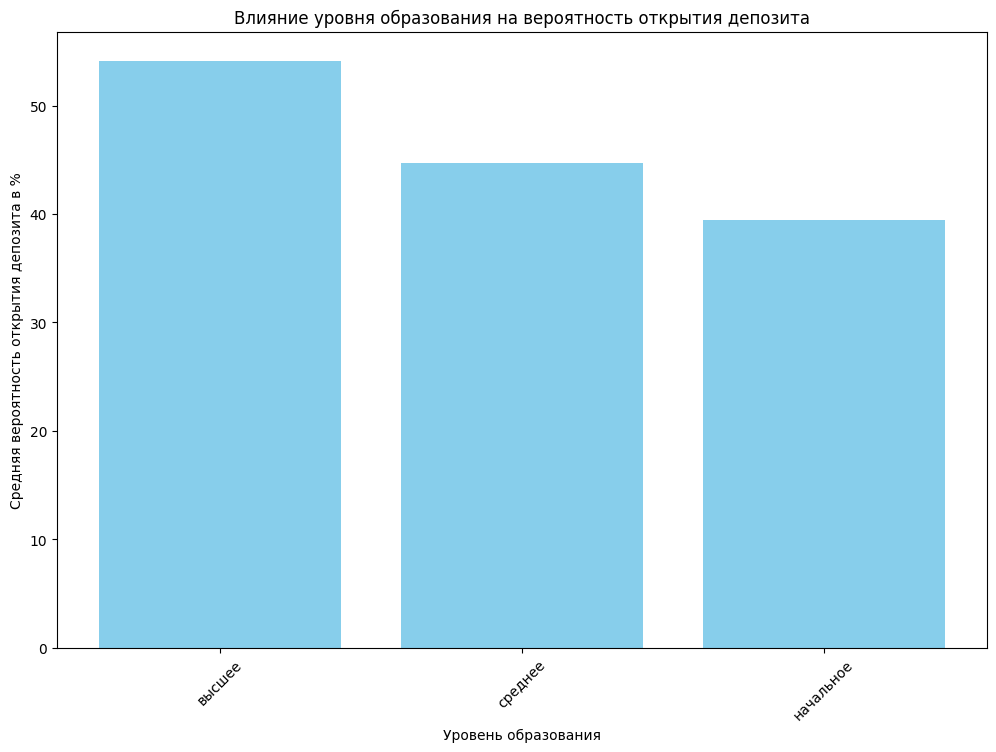

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 8))
plt.bar(education_deposit['education'], education_deposit['deposit_binary'], color='skyblue')
plt.xlabel('Уровень образования')
plt.ylabel('Средняя вероятность открытия депозита в %')
plt.title('Влияние уровня образования на вероятность открытия депозита')
plt.xticks(rotation=45)
plt.show()

## Вывод

C большей вероятностью депозит возьмут люди с высшим образованием (54%)

# Гипотеза 4: Высокий баланс счета положительно коррелирует с открытием депозита

In [ ]:
# Разделим данные на группы по балансу счета
# Определим границы для группировки
bins = [-float('inf'), 0, 1000, 5000, 10000, float('inf')]
labels = ['<= 0', '1-1000', '1001-5000', '5001-10000', '> 10000']
df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels)

# Группировка по группам баланса и подсчет средней вероятности открытия депозита
balance_deposit = df.groupby('balance_group')['deposit_binary'].mean()*100
balance_deposit = balance_deposit.reset_index()

balance_deposit

<ipython-input-20-238e39f2b035>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_deposit = df.groupby('balance_group')['deposit_binary'].mean()*100


,balance_group,deposit_binary
0,<= 0,34.336525
1,1-1000,44.866584
2,1001-5000,55.259939
3,5001-10000,56.353591
4,> 10000,59.210526


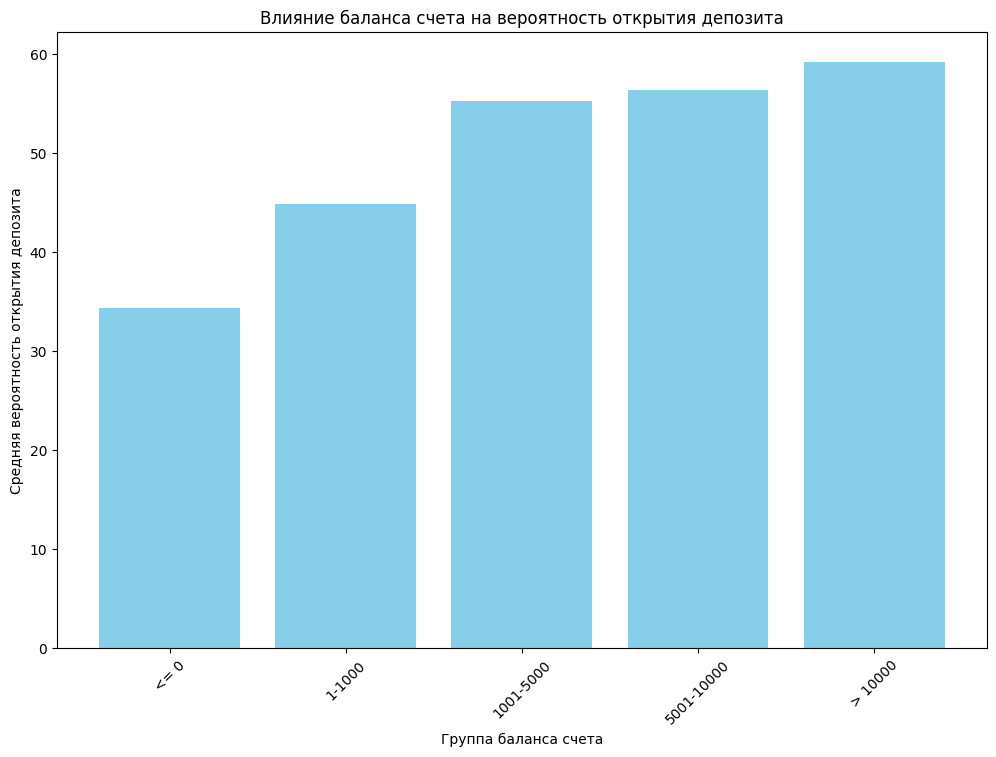

In [ ]:
# Визуализация результатов
plt.figure(figsize=(12, 8))
plt.bar(balance_deposit['balance_group'], balance_deposit['deposit_binary'], color='skyblue')
plt.xlabel('Группа баланса счета')
plt.ylabel('Средняя вероятность открытия депозита')
plt.title('Влияние баланса счета на вероятность открытия депозита')
plt.xticks(rotation=45)
plt.show()

## Вывод

Чем выше баланс счета, тем выше вероятность открытия депозита

# Гипотеза 5: Наличие жилищного кредита (housing) и/или личного кредита (loan) влияет на решение об открытии депозита.

In [ ]:
# Группировка по наличию жилищного кредита и подсчет средней вероятности открытия депозита
housing_deposit = df.groupby('housing')['deposit_binary'].mean()*100
housing_deposit = housing_deposit.reset_index()
housing_deposit



,housing,deposit_binary
0,no,57.031117
1,yes,36.640788


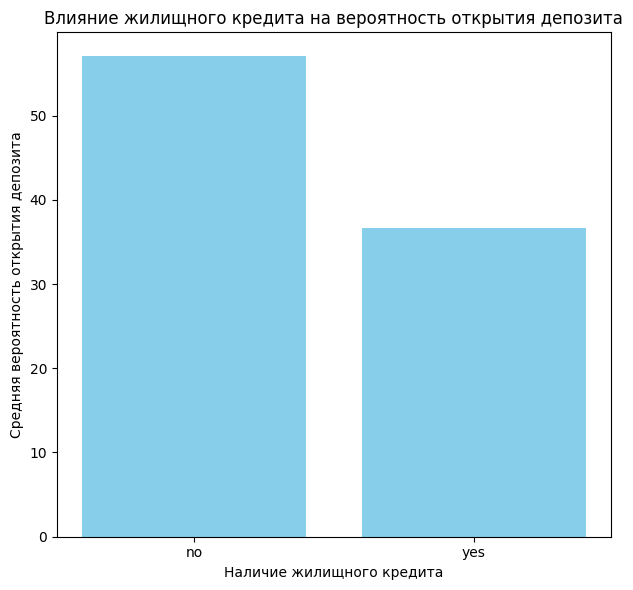

In [ ]:
# Визуализация результатов для жилищного кредита
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(housing_deposit['housing'], housing_deposit['deposit_binary'], color='skyblue')
plt.xlabel('Наличие жилищного кредита')
plt.ylabel('Средняя вероятность открытия депозита')
plt.title('Влияние жилищного кредита на вероятность открытия депозита')
plt.tight_layout()
plt.show()

## Вывод
Для тех, у кого отсутствует жилищный кредит вероятность открытия депозита выше на 20%

In [ ]:
# Группировка по наличию личного кредита и подсчет средней вероятности открытия депозита
loan_deposit = df.groupby('loan')['deposit_binary'].mean()*100
loan_deposit = loan_deposit.reset_index()
loan_deposit


,loan,deposit_binary
0,no,49.525871
1,yes,33.150685


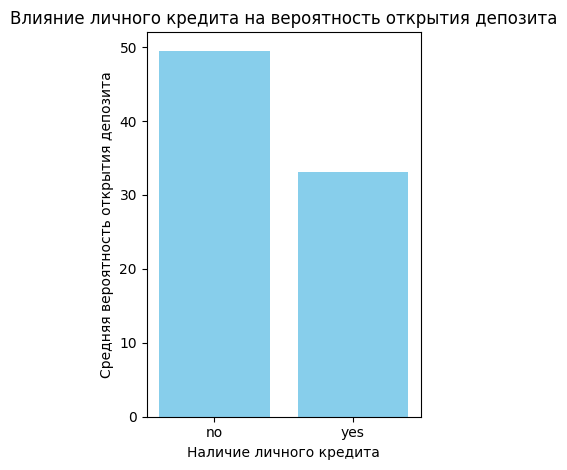

In [ ]:
# Визуализация результатов для личного кредита
plt.subplot(1, 2, 2)
plt.bar(loan_deposit['loan'], loan_deposit['deposit_binary'], color='skyblue')
plt.xlabel('Наличие личного кредита')
plt.ylabel('Средняя вероятность открытия депозита')
plt.title('Влияние личного кредита на вероятность открытия депозита')
plt.tight_layout()
plt.show()

##Вывод

Для тех, у кого отсутствует личный кредит вероятность открытия депозита выше на 15%